# Capstone Project - Car Accident Severity

https://www.coursera.org/learn/applied-data-science-capstone

## Table of Contents
* [Introduction: Business Understanding/Problem ](#Introduction)
* [Data](#Data)
    * [Data Gathering](#DataGathering)
	* [Clean up missing data](#CleanUpMissingData)
    * [Check Data Inconsistencies](#CheckDataInconsistencies)
		* [Check SEVERITYCODE](#CheckSEVERITYCODE)
		* [Check PERSONCOUNT](#CheckPERSONCOUNT)
		* [Check PEDCOUNT](#CheckPEDCOUNT)
		* [Check PEDCYLCOUNT](#CheckPEDCYLCOUNT)
		* [Check VEHCOUNT](#CheckVEHCOUNT)
		* [Check COLLISIONTYPE](#CheckCOLLISIONTYPE)
		* [Check JUNCTIONTYPE](#CheckJUNCTIONTYPE)
	* [Data Normalization](#DataNormalization)
* [Methodology](#Methodology)
* [Data Analysis](#DataAnalysis)
	* [Linear Regression Analysis](#LinearRegressionAnalysis)
	* [Polynomial Feature Analysis](#PolynomialFeatureAnalysis)
    * [Ridge Regression Analysis](#RidgeRegressionAnalysis)
	* [Grid Search Analysis](#GridSearchAnalysis)
* [Result and Discussion](#ResultAndDiscussion)
* [Conclusion](#Conclusion)

# Introduction: Business Understanding/Problem 

<a name="Introduction"></a>

In this project we are trying to determine the severity of a car accident in Seattle and how we can prevent severe car accidents.

Dispatch has a tough enough job already. We are interested in helping dispatches' day to day job with a recommender system to determine the severity of a car accident to determine law enforcement response and medical response.

We will generate a model from our data analysis to better predict the severity of the accident. We hope that this will better help dispatch, allocate the right amount of resource to the issue at hand, and protect the citizens of Seattle

# Data

<a name="Data"></a>

## Imports

In [1]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

## Data Gathering

<a name="DataGathering"></a>

Let's look at the data to determine what we have. This is the data that is provided by for the project.

In [4]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


There are 37 features we can choose from to use in our model to predict the severity code

In [5]:
df_data['SEVERITYCODE'].value_counts(dropna=False)

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

According to the metadata, there should be 5 types of severity.
* 3-fatality
* 2b-serious injury
* 2-injury
* 1-property damage
* 0-unknown

It is concerning that the data provided only has severity types 1 and 2. This may severely impact the machine learning model and does not provide us with sufficient data to determine all the types of severity.

It has been determined that the above dataset is insufficient so we have went out and found a more updates data set from http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

In [6]:
# The code was removed by Watson Studio for sharing.

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.392900,47.648646,1,332176,333676,EA40602,Matched,Intersection,26581.0,28TH AVE W AND W DRAVUS ST,...,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
1,-122.284487,47.603308,2,328504,330004,EA10294,Unmatched,Block,NaN,LAKE WASHINGTON BLVD BETWEEN LAKESIDE AVE AND ...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
2,-122.338480,47.619119,3,329091,330591,EA15604,Matched,Block,NaN,WESTLAKE AVE N BETWEEN DENNY WAY AND JOHN ST,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.358307,47.653110,4,328274,329774,EA07215,Matched,Block,NaN,NW 36TH ST BETWEEN 1ST AVE NW AND LEARY WAY NW,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
4,-122.296519,47.733786,5,329003,330503,E986969,Matched,Intersection,35990.0,30TH AVE NE AND NE 145TH ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


In [7]:
df_data_updated['SEVERITYCODE'].value_counts(dropna=False)

1      137297
2       58607
0       21593
2b       3090
3         349
NaN         1
Name: SEVERITYCODE, dtype: int64

Alright! This is more like it!

We will be using the following features to determine the severity code:
* COLLISIONTYPE
* PERSONCOUNT
* PEDCOUNT
* PEDCYLCOUNT
* VEHCOUNT
* JUNCTIONTYPE

## Clean up missing data

<a name="CleanUpMissingData"></a>

Any data with NaN does not provide much analysis for the data. Those data will be discarded

Dropping rows with SEVERITYCODE = 0 or NaN since they do not have enough information to build the model

In [8]:
df_data_analyze = df_data_updated[['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE']]
df_data_analyze.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE
0,2,Rear Ended,2,0,0,2,At Intersection (intersection related)
1,0,NaN,0,0,0,0,NaN
2,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection)
3,1,Parked Car,4,0,0,4,Mid-Block (not related to intersection)
4,2,Angles,2,0,0,2,At Intersection (intersection related)


In [9]:
df_data_analyze['SEVERITYCODE'].value_counts(dropna=False) # Check type of values for SEVERITYCODE

1      137297
2       58607
0       21593
2b       3090
3         349
NaN         1
Name: SEVERITYCODE, dtype: int64

In [10]:
df_data_analyze = df_data_analyze[df_data_analyze['SEVERITYCODE'] != '0'] # Drop any rows with 0 for severity code
df_data_analyze.dropna(axis=0, inplace=True) # Drop any rows with NaN data
df_data_analyze.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE
0,2,Rear Ended,2,0,0,2,At Intersection (intersection related)
2,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection)
3,1,Parked Car,4,0,0,4,Mid-Block (not related to intersection)
4,2,Angles,2,0,0,2,At Intersection (intersection related)
5,1,Rear Ended,3,0,0,2,Mid-Block (not related to intersection)


In [11]:
df_data_analyze['SEVERITYCODE'].value_counts(dropna=False) #Rechecking

1     127804
2      57275
2b      3028
3        337
Name: SEVERITYCODE, dtype: int64

In [12]:
# Checking of there are any other NaN values in the data set
missing_data = df_data_analyze.isnull()
missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    188444
Name: SEVERITYCODE, dtype: int64

COLLISIONTYPE
False    188444
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    188444
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    188444
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    188444
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    188444
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188444
Name: JUNCTIONTYPE, dtype: int64



## Check data inconsistencies

<a name="CheckDataInconsistencies"></a>

### Check SEVERITYCODE

<a name="CheckSEVERITYCODE"></a>

In [13]:
df_data_analyze['SEVERITYCODE'].value_counts(dropna=False) # Check type of values for SEVERITYCODE

1     127804
2      57275
2b      3028
3        337
Name: SEVERITYCODE, dtype: int64

Changing values in SEVERITYCODE to reflect integers.

* 3-fatality               => 4-fatality
* 2b-serious injury        => 3-serious injury
* 2-injury
* 1-property damage
* 0-unknown


In [14]:
df_data_analyze['SEVERITYCODE'].replace('3','4', inplace=True)
df_data_analyze['SEVERITYCODE'].replace('2b','3', inplace=True)

In [15]:
df_data_analyze['SEVERITYCODE'].value_counts(dropna=False) # Check type of values for SEVERITYCODE

1    127804
2     57275
3      3028
4       337
Name: SEVERITYCODE, dtype: int64

In [16]:
df_data_analyze['SEVERITYCODE'] = df_data_analyze['SEVERITYCODE'].astype('int') # Change type to int
df_data_analyze['SEVERITYCODE'].dtype

dtype('int64')

In [17]:
df_data_analyze.corr() #Checking Correlation  with the other numerical values

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.115662,0.285922,0.217358,-0.110882
PERSONCOUNT,0.115662,1.000000,-0.022998,-0.042569,0.400310
PEDCOUNT,0.285922,-0.022998,1.000000,-0.021081,-0.325299
PEDCYLCOUNT,0.217358,-0.042569,-0.021081,1.000000,-0.309258
VEHCOUNT,-0.110882,0.400310,-0.325299,-0.309258,1.000000


### Check PERSONCOUNT
<a name="CheckPERSONCOUNT"></a>

In [18]:
df_data_analyze['PERSONCOUNT'].describe()

count    188444.000000
mean          2.477877
std           1.388904
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          93.000000
Name: PERSONCOUNT, dtype: float64

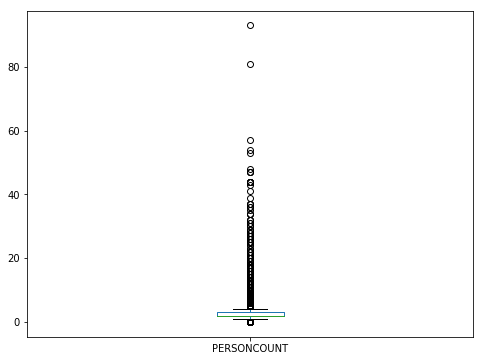

In [19]:
df_data_analyze['PERSONCOUNT'].plot(kind='box', figsize=(8, 6))
plt.show()

There is a huge disparity in data. We're going to remove some outliers

In [20]:
df_data_analyze['PERSONCOUNT'].value_counts(dropna=False) # Check type of values for PERSONCOUNT

2     108886
3      35827
4      14720
1      11750
5       6748
0       5410
6       2774
7       1174
8        545
9        225
10       133
11        59
12        35
13        22
14        22
15        11
17        11
16         8
44         6
20         6
25         6
18         6
19         6
22         5
29         4
26         4
23         3
32         3
47         3
27         3
28         3
37         3
34         3
21         2
36         2
31         2
30         2
24         2
35         1
81         1
39         1
41         1
43         1
48         1
53         1
54         1
57         1
93         1
Name: PERSONCOUNT, dtype: int64

In [21]:
df_data_updated[df_data_updated['PERSONCOUNT'] == 93] # Strange Data

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
163697,-122.347294,47.647172,163698,203057,203197,3703661,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Dry,Daylight,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N


https://www.cnn.com/2015/09/24/us/seattle-tour-bus-duck-tour-fatal-accident/index.html

Wow this was a horrific collision. Using data analysis we were able to find this data quickly.

In [22]:
df_data_analyze = df_data_analyze[df_data_analyze['PERSONCOUNT'] < 6] # Drop any rows with 0 for severity code

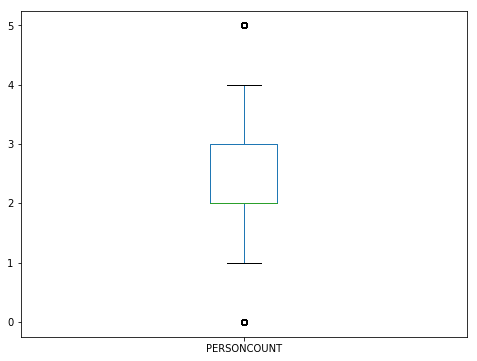

In [23]:
df_data_analyze['PERSONCOUNT'].plot(kind='box', figsize=(8, 6))
plt.show()

### Check PEDCOUNT
<a name="CheckPEDCOUNT"></a>

In [24]:
df_data_analyze['PEDCOUNT'].value_counts(dropna=False) # Check type of values for PERSONCOUNT

0    175471
1      7582
2       256
3        25
4         7
Name: PEDCOUNT, dtype: int64

### Check PEDCYLCOUNT
<a name="CheckPEDCYLCOUNT"></a>

In [25]:
df_data_analyze['PEDCYLCOUNT'].value_counts(dropna=False) # Check type of values for PEDCYLCOUNT

0    177449
1      5843
2        49
Name: PEDCYLCOUNT, dtype: int64

### Check VEHCOUNT
<a name="CheckVEHCOUNT"></a>

In [26]:
df_data_analyze['VEHCOUNT'].value_counts(dropna=False) # Check type of values for VEHCOUNT

2     141561
1      27083
3      12089
4       2015
5        344
0        239
6          6
7          2
11         1
9          1
Name: VEHCOUNT, dtype: int64

### Check COLLISIONTYPE
<a name="CheckCOLLISIONTYPE"></a>

In [27]:
#['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE']
df_data_analyze['COLLISIONTYPE'].value_counts(dropna=False) # Check type of values for COLLISIONTYPE

Parked Car    43416
Angles        34009
Rear Ended    32584
Other         23532
Sideswipe     17995
Left Turn     13525
Pedestrian     7504
Cycles         5836
Right Turn     2869
Head On        2071
Name: COLLISIONTYPE, dtype: int64

In [28]:
df_data_analyze['COLLISIONTYPE'].astype(str)
df_data_analyze.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE
0,2,Rear Ended,2,0,0,2,At Intersection (intersection related)
2,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection)
3,1,Parked Car,4,0,0,4,Mid-Block (not related to intersection)
4,2,Angles,2,0,0,2,At Intersection (intersection related)
5,1,Rear Ended,3,0,0,2,Mid-Block (not related to intersection)


In [29]:
df_data_analyze = df_data_analyze[df_data_analyze['COLLISIONTYPE'] != 'Other'] # Drop any rows with 0 for severity code

In [30]:
#['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE']
df_data_analyze['COLLISIONTYPE'].value_counts(dropna=False) # Check type of values for JUNCTIONTYPE

Parked Car    43416
Angles        34009
Rear Ended    32584
Sideswipe     17995
Left Turn     13525
Pedestrian     7504
Cycles         5836
Right Turn     2869
Head On        2071
Name: COLLISIONTYPE, dtype: int64

In [31]:
dummy_variable_COLLISIONTYPE = pd.get_dummies(df_data_analyze['COLLISIONTYPE'])
df_data_analyze = pd.concat([df_data_analyze, dummy_variable_COLLISIONTYPE], axis=1)
df_data_analyze.drop('COLLISIONTYPE', axis=1, inplace=True)

In [32]:
df_data_analyze.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,Angles,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,2,2,0,0,2,At Intersection (intersection related),0,0,0,0,0,0,1,0,0
2,1,2,0,0,2,Mid-Block (not related to intersection),0,0,0,0,0,0,0,0,1
3,1,4,0,0,4,Mid-Block (not related to intersection),0,0,0,0,1,0,0,0,0
4,2,2,0,0,2,At Intersection (intersection related),1,0,0,0,0,0,0,0,0
5,1,3,0,0,2,Mid-Block (not related to intersection),0,0,0,0,0,0,1,0,0


### Check JUNCTIONTYPE
<a name="CheckJUNCTIONTYPE"></a>

In [33]:
#['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE']
df_data_analyze['JUNCTIONTYPE'].value_counts(dropna=False) # Check type of values for JUNCTIONTYPE

Mid-Block (not related to intersection)              74318
At Intersection (intersection related)               57988
Mid-Block (but intersection related)                 18768
Driveway Junction                                     6828
At Intersection (but not related to intersection)     1775
Ramp Junction                                          127
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

In [34]:
df_data_analyze['JUNCTIONTYPE'].astype(str)
df_data_analyze.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,Angles,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,2,2,0,0,2,At Intersection (intersection related),0,0,0,0,0,0,1,0,0
2,1,2,0,0,2,Mid-Block (not related to intersection),0,0,0,0,0,0,0,0,1
3,1,4,0,0,4,Mid-Block (not related to intersection),0,0,0,0,1,0,0,0,0
4,2,2,0,0,2,At Intersection (intersection related),1,0,0,0,0,0,0,0,0
5,1,3,0,0,2,Mid-Block (not related to intersection),0,0,0,0,0,0,1,0,0


Drop Unknown rows because it doesn't add to the data analysis

In [35]:
df_data_analyze = df_data_analyze[df_data_analyze['JUNCTIONTYPE'] != 'Unknown'] # Drop any rows with 0 for severity code

In [36]:
#['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE']
df_data_analyze['JUNCTIONTYPE'].value_counts(dropna=False) # Check type of values for JUNCTIONTYPE

Mid-Block (not related to intersection)              74318
At Intersection (intersection related)               57988
Mid-Block (but intersection related)                 18768
Driveway Junction                                     6828
At Intersection (but not related to intersection)     1775
Ramp Junction                                          127
Name: JUNCTIONTYPE, dtype: int64

In [37]:
dummy_variable_JUNCTIONTYPE = pd.get_dummies(df_data_analyze['JUNCTIONTYPE'])
df_data_analyze = pd.concat([df_data_analyze, dummy_variable_JUNCTIONTYPE], axis=1)
df_data_analyze.drop('JUNCTIONTYPE', axis=1, inplace=True)

In [38]:
df_data_analyze.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,Angles,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
0,2,2,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,2,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,4,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2,2,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,1,3,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## 	Data Normalization


<a name="DataNormalization"></a>

In [39]:
df_data_analyze['SEVERITYCODE']=df_data_analyze['SEVERITYCODE']/df_data_analyze['SEVERITYCODE'].max()

df_data_analyze['PERSONCOUNT']=df_data_analyze['PERSONCOUNT']/df_data_analyze['PERSONCOUNT'].max()
df_data_analyze['PEDCOUNT']=df_data_analyze['PEDCOUNT']/df_data_analyze['PEDCOUNT'].max()
df_data_analyze['PEDCYLCOUNT']=df_data_analyze['PEDCYLCOUNT']/df_data_analyze['PEDCYLCOUNT'].max()
df_data_analyze['VEHCOUNT']=df_data_analyze['VEHCOUNT']/df_data_analyze['VEHCOUNT'].max()
df_data_analyze.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,Angles,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
0,0.50,0.4,0.0,0.0,0.181818,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.25,0.4,0.0,0.0,0.181818,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.25,0.8,0.0,0.0,0.363636,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0.50,0.4,0.0,0.0,0.181818,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0.25,0.6,0.0,0.0,0.181818,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


# Methodology
<a name="Methodology"></a>

We will be using 6 features taken from the original dataset to determine the severity of a collision. We will try a variety of methods to determine the best model.

The dataset is clean and massages to numeric values for analysis by linear regression. The person count, pedestrian count, pedalcyclist count, vehicle count, the type of collision, and the area of the block as variables to determine the severity.

The analysis takes on data that is without any missing data and some outliers are taken out. We will try to use the most complete and accurate data to create an accurate model.

# Data Analysis
<a name="DataAnalysis"></a>

In [40]:
df_data_analyze.reset_index(drop=True, inplace=True) #Doesn't matter.. but looks prettier

In [41]:
y_data = df_data_analyze['SEVERITYCODE']

In [42]:
y_data.head()

0    0.50
1    0.25
2    0.25
3    0.50
4    0.25
Name: SEVERITYCODE, dtype: float64

In [43]:
x_data = df_data_analyze.drop('SEVERITYCODE', axis=1)

In [44]:
x_data.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,Angles,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
0,0.4,0.0,0.0,0.181818,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.4,0.0,0.0,0.181818,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.8,0.0,0.0,0.363636,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0.4,0.0,0.0,0.181818,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.6,0.0,0.0,0.181818,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [45]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 23971
number of training samples: 135833


## Linear Regression Analysis
<a name="LinearRegressionAnalysis"></a>

In [46]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
lr.score(x_train,y_train)

0.27347393712870904

In [48]:
lr.score(x_test,y_test)

0.26888559783825083

From the first trial of linear regression, we attained a score of 27% with the training data and 26% from test data

## Polynomial Feature Analysis
<a name="PolynomialFeatureAnalysis"></a>

In [49]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

In [50]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
poly.score(x_train_pr, y_train)

0.2799345772827011

In [52]:
poly.score(x_test_pr, y_test)

-7.278571900325142e+17

From a simple 2 degree polynomial feature we attain a training score of 27% and a negative number from test data. This is probably not a good model as the test data was not very good at predicting the severity. On any degree greater than 2 takes a lot longer to run for polynomial features and results did not yield any greater improvement. This method is deemed not very viable for our model

## Ridge Regression Analysis
<a name="RidgeRegressionAnalysis"></a>

In [53]:
from sklearn.linear_model import Ridge

# Same as the Polynominal Feature Analysis
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [54]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,10))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

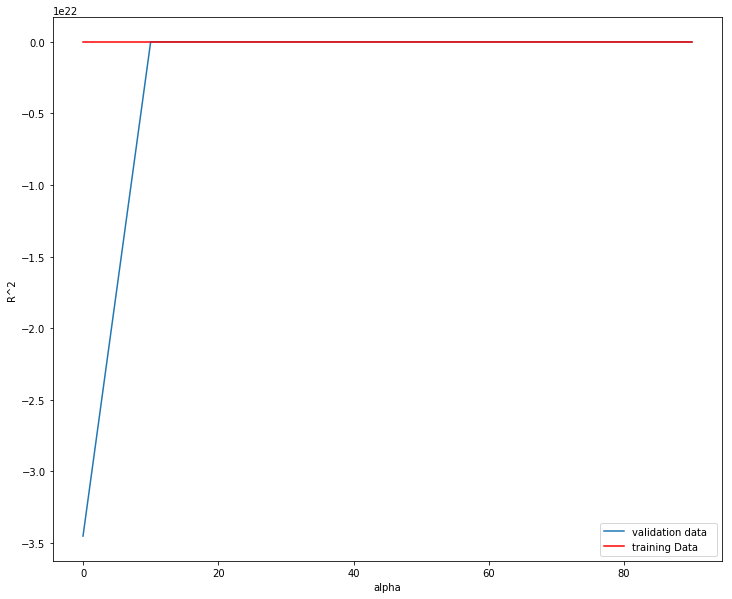

In [55]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [56]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.2717248036005492

Keeping the polynomial to degree 2 we used ridge regression to determine the best alpha. We attained 27% with test data

## Grid Search Analysis
<a name="GridSearchAnalysis"></a>

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [59]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [60]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [61]:
Grid1.fit(x_data, y_data)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
BestRR.score(x_test, y_test)

0.269348084062327

In [64]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data,y_data)
Grid2.best_estimator_

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [65]:
RigeModel = Ridge(alpha=0.001) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.2734150217488033

The grid search has determined that the best alpha for the ridge model would be 0.001 and has attained a score of 27%

# Result and Discussion
<a name="ResultAndDiscussion"></a>

The analysis shows that there is not as much correlation from the features we have picked to determine the severity code. While we do have a 27% R^2 with the features we have picked, determining the severity of a collision may need more data. While checking the correlation of the data, there was not much correlation to begin with. 

Some other future improvement can include, taking out more outliers, gathering more data, and attempt to build a neural network model. Some of the data we can take out are the vehicle count. The correlation to the severity code is not much. Other things we can do to improve the model is to build one for just auto to auto related collisions and take out any pedalcyclist and pedestrian collisions to be made into another model. Data we can try to gather for the next round of analysis, we can get geo spatial data and weather data to determine if certain areas may contain more sever collisions. Lastly, a neural network may aid in better results than a simple linear or polynomial regression.

# Conclusion
<a name="Conclusion"></a>

The purpose of this project is to determine the severity of a collision by the data provided. From our analysis we have built a model with 27% accuracy. While this is not the best outcome, there are potentially may more data we can add to the analysis. We have learned many lessons from this round of analysis and will be applying the lessons to refine our model accuracy. 

The stakeholder can use the model as a recommender system for dispatch but as a recommendation of what the severity code is, but the decision should be up ultimately to the user.